In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

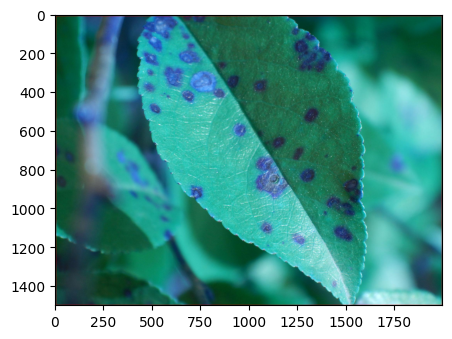

In [2]:
image = cv2.imread("../../images/image.jpg")

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define a color range for brown spots
lower_brown = np.array([10, 100, 50])  # Adjust these values based on the color of brown spots in your images
upper_brown = np.array([30, 255, 255])  # Adjust these values based on the color of brown spots in your images

# Create a mask for brown spots
mask = cv2.inRange(hsv, lower_brown, upper_brown)

# Apply connected components labeling to identify individual disease zones
segmented_image, labels, stats, _ = cv2.connectedComponentsWithStats(mask, 8)

# Identify disease zones based on size and location
disease_zones = []
for i, stat in enumerate(stats):
    if stat[4] > 100:  # Adjust this value based on the minimum size of disease zones you want to detect
        disease_zones.append((stat[0], stat[1], stat[2], stat[3]))

# Display the original image with disease zones highlighted
plt.figure(figsize=(5,5))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Draw rectangles around the disease zones on the original image
for zone in disease_zones:
    x, y, w, h = zone
    rect = plt.Rectangle((x, y), w, h, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)

# Save the plot as an image
plt.savefig("result.png")